In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json

In [18]:
def data_from_json(name):
    data = []
    #Each line in the json is an evolutionary run
    with open(name, 'r') as fp:
        for levels_json in fp:
            if levels_json != "\n":
                di = json.loads(levels_json)
                data.append(di)
    return data

In [19]:
def extract_best_result(data):
    best_results = []
    #First we extract the best results of each run
    for i in range(len(data)):
        best_results += [data[i]["evaluations"][-1]]
    best_result = data[np.argmin(np.array(best_results))]
    return best_result

In [20]:
data_sphere = data_from_json('sphere_analytics.json')
data_schaffer = data_from_json('schaffer_analytics.json')

In [21]:
#We obtain the run which had the best result
best_result_sphere = extract_best_result(data_sphere)
best_result_schaffer = extract_best_result(data_schaffer)

In [24]:
def plot_evaluation(best_result, name):
    t = np.arange(len(best_result["evaluations"]))

    fig, ax = plt.subplots()
    ax.plot(t, best_result["evaluations"])

    ax.set(xlabel='Iteration', ylabel='Function evaluation')
    ax.grid()

    fig.savefig(name)
    plt.show()

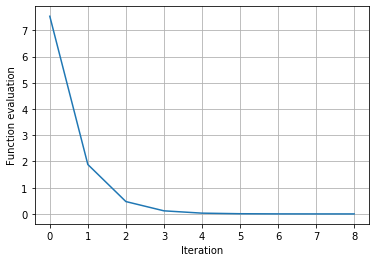

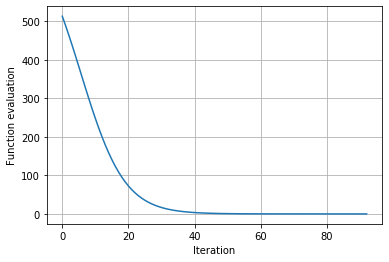

In [25]:
plot_evaluation(best_result_sphere, "sphere_evaluations.png")
plot_evaluation(best_result_schaffer, "schaffer_evaluation.png")

In [29]:
#Best solution for sphere function
print(best_result_sphere["x_s"][-1] + [best_result_sphere["evaluations"][-1]])
#Best solution for schaffer function
print(best_result_schaffer["x_s"][-1] + [best_result_schaffer["evaluations"][-1]])

[0.004906655400319093, -0.009536361824095011, 0.00011501746405753724]
[420.96322084123995, 420.8800715895233, 0.0010214816552434058]
